In [1]:
import pandas as pd
import numpy as np

In [8]:
df_raw = pd.read_csv('/data/students/yang/Untitled Folder/all.csv')
del df_raw['Unnamed: 0']
del df_raw['local_resp']
del df_raw['missed_bytes']
# df_raw['detailed_label'] = df_raw['detailed_label'].replace(to_replace= '-',value= 'Benign')
df_raw['proto'] = df_raw['proto'].map({"tcp":6,"udp":17,"icmp":1})
df_raw = df_raw[(df_raw['detailed_label']=="Attack")|(df_raw['detailed_label']=="Benign")|(df_raw['detailed_label']=="C&C")|(df_raw['detailed_label']=="DDoS")]
df_raw['detailed_label'] = df_raw['detailed_label'].replace(to_replace= 'Attack',value= 2)
df_raw['detailed_label'] = df_raw['detailed_label'].replace(to_replace= 'Benign',value= -1)
df_raw['detailed_label'] = df_raw['detailed_label'].replace(to_replace= 'C&C',value= 3)
df_raw['detailed_label'] = df_raw['detailed_label'].replace(to_replace= 'DDoS',value= 4)
df_raw = df_raw.replace(to_replace= '-',value= np.nan)

/data/env/ai/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3185: DtypeWarning: Columns (21,22,23,24,25,26,27,29) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [9]:
df_raw['detailed_label'].value_counts()

-1    19539
 3    14936
 4    14394
 2     5962
Name: detailed_label, dtype: int64

<AxesSubplot:>

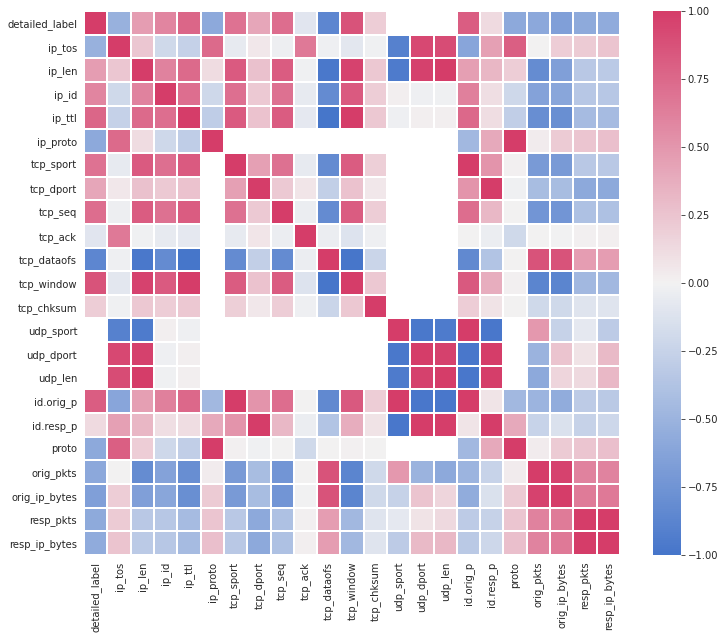

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

Var_Corr = df_raw.corr(method='spearman')
# Var_Corr = df_raw.corr(method='kendall')
fig, ax = plt.subplots(figsize=(12,10))

cmap = sns.diverging_palette(255, 0, as_cmap=True, center="light")

sns.heatmap(Var_Corr, xticklabels=Var_Corr.columns, yticklabels=Var_Corr.columns, linewidths=1, ax=ax, cmap=cmap,vmax=1,vmin=-1)